In [10]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
london_bikes_df = pd.read_csv('london.csv')

In [4]:
london_bikes_df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
london_bikes_df.shape

(17414, 10)

In [8]:
london_bikes_df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [7]:
london_bikes_df['timestamp'] = pd.to_datetime(london_bikes_df['timestamp'])

In [9]:
london_bikes_df.isna().any()

timestamp       False
cnt             False
t1              False
t2              False
hum             False
wind_speed      False
weather_code    False
is_holiday      False
is_weekend      False
season          False
dtype: bool

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

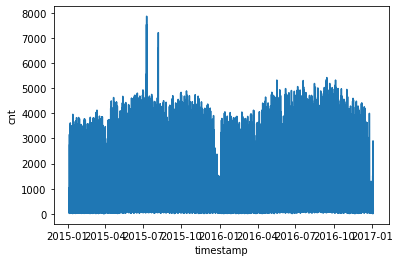

In [11]:
sns.lineplot(x=london_bikes_df.timestamp, y=london_bikes_df.cnt)

In [17]:
days_vs_cnt = pd.DataFrame()
days_vs_cnt['time'] = london_bikes_df.timestamp
days_vs_cnt['cnt'] = london_bikes_df.cnt
               

In [19]:
days_vs_cnt.sort_values('time', inplace=True)

In [22]:
days_vs_cnt.set_index('time', inplace=True)

In [23]:
days_vs_cnt

,cnt
time,
2015-01-04 00:00:00,182
2015-01-04 01:00:00,138
2015-01-04 02:00:00,134
2015-01-04 03:00:00,72
2015-01-04 04:00:00,47
...,...
2017-01-03 19:00:00,1042
2017-01-03 20:00:00,541
2017-01-03 21:00:00,337


In [27]:
days_vs_cnt = days_vs_cnt.resample(rule='D') \
                .agg({'cnt':'sum'})

In [28]:
days_vs_cnt

,cnt
time,
2015-01-04,9234
2015-01-05,20372
2015-01-06,20613
2015-01-07,21064
2015-01-08,15601
...,...
2016-12-30,11566
2016-12-31,11424
2017-01-01,6421


<AxesSubplot:xlabel='time'>

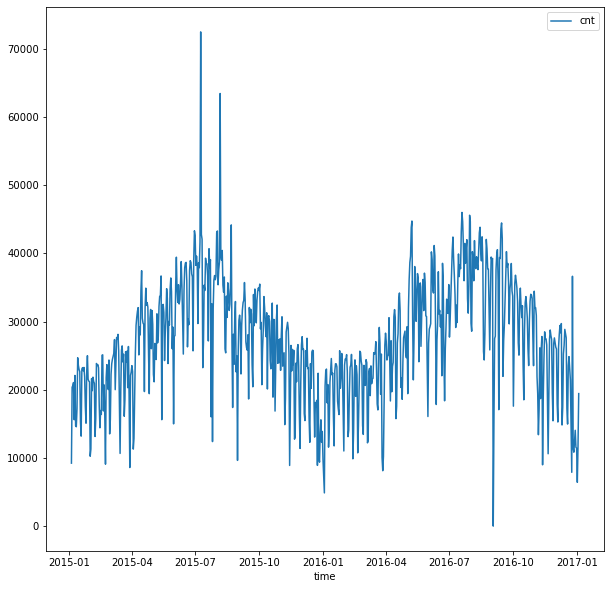

In [31]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=days_vs_cnt)

In [32]:
#Скользящее среднее с окном 3

In [34]:
days_vs_cnt['roll_avg'] = days_vs_cnt.cnt.rolling(3).mean()

In [35]:
days_vs_cnt

,cnt,roll_avg
time,,
2015-01-04,9234,NaN
2015-01-05,20372,NaN
2015-01-06,20613,16739.666667
2015-01-07,21064,20683.000000
2015-01-08,15601,19092.666667
...,...,...
2016-12-30,11566,12682.000000
2016-12-31,11424,12347.333333
2017-01-01,6421,9803.666667


In [36]:
days_vs_cnt.loc['2015-07-09'].round(0)

cnt         72504.0
roll_avg    50705.0
Name: 2015-07-09 00:00:00, dtype: float64

In [49]:
days_vs_cnt['differ'] = days_vs_cnt.cnt - days_vs_cnt.roll_avg

In [58]:
days_vs_cnt.head()

,cnt,roll_avg,differ
time,,,
2015-01-04,9234,NaN,NaN
2015-01-05,20372,NaN,NaN
2015-01-06,20613,16739.666667,3873.333333
2015-01-07,21064,20683.000000,381.000000
2015-01-08,15601,19092.666667,-3491.666667


In [52]:
del days_vs_cnt['diff']

In [54]:
std = np.std(days_vs_cnt.differ)

In [57]:
round(std, 2)

4558.59

In [60]:
days_vs_cnt['upper_bound'] = days_vs_cnt.roll_avg + 2.576*std
days_vs_cnt['low_bound'] = days_vs_cnt.roll_avg - 2.576*std

In [61]:
days_vs_cnt.head()

,cnt,roll_avg,differ,upper_bound,low_bound
time,,,,,
2015-01-04,9234,NaN,NaN,NaN,NaN
2015-01-05,20372,NaN,NaN,NaN,NaN
2015-01-06,20613,16739.666667,3873.333333,28482.585854,4996.747479
2015-01-07,21064,20683.000000,381.000000,32425.919188,8940.080812
2015-01-08,15601,19092.666667,-3491.666667,30835.585854,7349.747479


In [62]:
days_vs_cnt.iloc[-1]

cnt            19436.000000
roll_avg       12560.000000
differ          6876.000000
upper_bound    24302.919188
low_bound        817.080812
Name: 2017-01-03 00:00:00, dtype: float64

In [67]:
days_vs_cnt.query('cnt > upper_bound').idxmax()

cnt           2015-07-09
roll_avg      2015-07-09
differ        2015-07-09
upper_bound   2015-07-09
low_bound     2015-07-09
dtype: datetime64[ns]

In [68]:
london_bikes_df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [93]:
london_bikes_df.loc[london_bikes_df.timestamp.dt.date == pd.to_datetime('2015-07-09')]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
4453,2015-07-09 00:00:00,400,16.0,16.0,55.0,14.0,1.0,0.0,0.0,1.0
4454,2015-07-09 01:00:00,212,15.5,15.5,59.0,14.0,1.0,0.0,0.0,1.0
4455,2015-07-09 02:00:00,111,14.0,14.0,67.0,15.0,1.0,0.0,0.0,1.0
4456,2015-07-09 03:00:00,81,14.0,14.0,63.0,18.5,1.0,0.0,0.0,1.0
4457,2015-07-09 04:00:00,76,14.0,14.0,63.0,18.0,1.0,0.0,0.0,1.0
4458,2015-07-09 05:00:00,269,13.0,13.0,67.0,17.0,1.0,0.0,0.0,1.0
4459,2015-07-09 06:00:00,1724,13.0,13.0,67.0,16.0,1.0,0.0,0.0,1.0
4460,2015-07-09 07:00:00,5309,13.5,13.5,65.0,17.0,1.0,0.0,0.0,1.0
4461,2015-07-09 08:00:00,7531,14.5,14.5,61.0,19.0,2.0,0.0,0.0,1.0
4462,2015-07-09 09:00:00,4832,15.0,15.0,59.0,16.0,2.0,0.0,0.0,1.0


In [98]:
days_vs_cnt.query('cnt < low_bound')

,cnt,roll_avg,differ,upper_bound,low_bound
time,,,,,
2015-05-14,15609,28709.333333,-13100.333333,40452.252521,16966.414146
2015-07-12,23240,36036.666667,-12796.666667,47779.585854,24293.747479
2015-07-24,16034,31013.666667,-14979.666667,42756.585854,19270.747479
2015-08-24,17400,29529.333333,-12129.333333,41272.252521,17786.414146
2015-11-14,8898,21037.333333,-12139.333333,32780.252521,9294.414146
2016-09-02,0,26086.333333,-26086.333333,37829.252521,14343.414146
2016-09-10,17080,31262.000000,-14182.000000,43004.919188,19519.080812
2016-09-16,21967,36193.333333,-14226.333333,47936.252521,24450.414146
2016-11-12,8990,20878.000000,-11888.000000,32620.919188,9135.080812


In [104]:
london_bikes_df.loc[london_bikes_df.timestamp.dt.date == pd.to_datetime('2016-09-02')]

C:\Users\user\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
